In [76]:
%matplotlib inline

In [77]:
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
pd.set_option('display.max_columns', 50) # print all rows


import os
os.chdir('/Users/evanbiederstedt/Downloads/RRBS_data_files')

import statsmodels.api as sm

In [78]:
"""
total_normal_pairs_RRBS_NormalBCD19pcell45_66.csv
total_normal_pairs_RRBS_NormalBCD19pcell67_88.csv
total_normal_pairs_RRBS_NormalBCD19pcell23_44.csv
total_normal_pairs_RRBS_NormalBCD19pcell1_22.csv
total_normal_pairs_NormalBCD19pCD27mcell45_66.csv
total_normal_pairs_NormalBCD19pCD27mcell23_44.csv
total_normal_pairs_NormalBCD19pCD27mcell1_22.csv
total_normal_pairs_Normal_B_cell_A1_24.csv
total_normal_pairs_NormalBCD19pCD27mcell67_88.csv
total_normal_pairs_Normal_B_cell_H1_22.csv
total_normal_pairs_Normal_B_cell_G1_22.csv
total_normal_pairs_Normal_B_cell_D1_24.csv
total_normal_pairs_Normal_B_cell_C1_24.csv
total_normal_pairs_Normal_B_cell_B1_24.csv
total_CLL_pairs.csv
total_normal_pairs.csv
total_CLL_pairs_cw154_CutSmart_proteinase_K.csv
total_CLL_pairs_cw154_Tris_protease_GR.csv
total_CLL_pairs_cw154_Tris_protease.csv
total_CLL_pairs_trito_pool_2.csv
total_CLL_pairs_trito_pool_1.csv
"""

'\ntotal_normal_pairs_RRBS_NormalBCD19pcell45_66.csv\ntotal_normal_pairs_RRBS_NormalBCD19pcell67_88.csv\ntotal_normal_pairs_RRBS_NormalBCD19pcell23_44.csv\ntotal_normal_pairs_RRBS_NormalBCD19pcell1_22.csv\ntotal_normal_pairs_NormalBCD19pCD27mcell45_66.csv\ntotal_normal_pairs_NormalBCD19pCD27mcell23_44.csv\ntotal_normal_pairs_NormalBCD19pCD27mcell1_22.csv\ntotal_normal_pairs_Normal_B_cell_A1_24.csv\ntotal_normal_pairs_NormalBCD19pCD27mcell67_88.csv\ntotal_normal_pairs_Normal_B_cell_H1_22.csv\ntotal_normal_pairs_Normal_B_cell_G1_22.csv\ntotal_normal_pairs_Normal_B_cell_D1_24.csv\ntotal_normal_pairs_Normal_B_cell_C1_24.csv\ntotal_normal_pairs_Normal_B_cell_B1_24.csv\ntotal_CLL_pairs.csv\ntotal_normal_pairs.csv\ntotal_CLL_pairs_cw154_CutSmart_proteinase_K.csv\ntotal_CLL_pairs_cw154_Tris_protease_GR.csv\ntotal_CLL_pairs_cw154_Tris_protease.csv\ntotal_CLL_pairs_trito_pool_2.csv\ntotal_CLL_pairs_trito_pool_1.csv\n'

In [83]:
%ls

CD19_avgCpGs.csv
CD19_cpgs.csv
CD19cell_regions.csv
CD27cells.csv
CD27mcell_AvgCpG_read.csv
CD27p_vs_CD27m_methylation_by_protocol.png
CD27pcell_AvgCpG_read.csv
CLL_RRBS_cw154_A_CpGs.csv
CLL_cells_PDR_chromosomes1_7.csv
CLL_cells_PDR_total.csv
CLL_cells_PDR_total_chr2_5_11A.csv
CLL_cells_PDR_total_chr2_5_11B.csv
CLL_cells_PDR_total_chr2_5_11_tritoC.csv
CLL_cells_methylation_chr2_5_11A.csv
CLL_cells_methylation_chr2_5_11B.csv
CLL_cells_methylation_chr2_5_11C.csv
CLL_files.csv
Meth_PDR_NormalBCD19pcell_filteredGpC_less1.csv
Meth_PDR_NormalBCD19pcell_filteredGpC_less3.8.csv
Meth_PDR_cell_CD19_test.csv
Meth_PDR_cell_CLL_RRBS_NormalB_CLL_B.csv
Meth_PDR_cell_CLL_RRBS_cw154_A.csv
Meth_PDR_cell_CLL_RRBS_cw154_ALL.csv
Meth_PDR_cell_CLL_RRBS_cw154_exceptChr13.csv
Meth_PDR_cell_CLL_RRBS_cw154_filteredGpC_gtr_eql3.csv
Meth_PDR_cell_CLL_RRBS_cw154_filteredGpC_less1.csv
Meth_PDR_cell_CLL_RRBS_cw154_filteredGpC_less3.8.csv
Meth_PDR_cell_CLL_RRBS_trito_pool_C.csv
Meth_PDR_cell_CLL_RRBS_trito_pool_C_AL

In [86]:
pcell_pairs1 = pd.read_csv("total_normal_pairs_RRBS_NormalBCD19pcell1_22.csv")
pcell_pairs2 = pd.read_csv("total_normal_pairs_RRBS_NormalBCD19pcell23_44.csv")
pcell_pairs3 = pd.read_csv("total_normal_pairs_RRBS_NormalBCD19pcell45_66.csv")
pcell_pairs4 = pd.read_csv("total_normal_pairs_RRBS_NormalBCD19pcell67_88.csv")

mcell_pairs1 = pd.read_csv("total_normal_pairs_NormalBCD19pCD27mcell1_22.csv")
mcell_pairs2 = pd.read_csv("total_normal_pairs_NormalBCD19pCD27mcell23_44.csv")
mcell_pairs3 = pd.read_csv("total_normal_pairs_NormalBCD19pCD27mcell45_66.csv")
mcell_pairs4 = pd.read_csv("total_normal_pairs_NormalBCD19pCD27mcell67_88.csv")

In [87]:
print(pcell_pairs1.shape)
print(pcell_pairs2.shape)
print(pcell_pairs3.shape)
print(pcell_pairs4.shape)

print(mcell_pairs1.shape)
print(mcell_pairs2.shape)
print(mcell_pairs3.shape)
print(mcell_pairs4.shape)

(210, 43)
(190, 43)
(231, 43)
(210, 43)
(153, 43)
(171, 43)
(136, 43)
(210, 43)


In [88]:
pcell = pd.concat([pcell_pairs1, pcell_pairs2, pcell_pairs3, pcell_pairs4])

mcell = pd.concat([mcell_pairs1, mcell_pairs2, mcell_pairs3, mcell_pairs4])

In [89]:
pcell.shape

(841, 43)

In [90]:
mcell.shape

(670, 43)

In [91]:
mcell.columns

Index(['filename', 'methylation_difference', 'PDR_difference',
       'methylation_unweighted_difference', 'PDR_unweighted_difference',
       'methylation_tssDistance_difference',
       'methylation_genesDistance_difference',
       'methylation_exonsDistance_difference',
       'methylation_intronsDistance_difference',
       'methylation_promoterDistance_difference',
       'methylation_cgiDistance_difference',
       'methylation_ctcfDistance_difference',
       'methylation_ctcfUpDistance_difference',
       'methylation_ctcfDownDistance_difference',
       'methylation_geneDistalRegulatoryModulesDistance',
       'methylation_vistaEnhancersDistance_difference',
       'methylation_3PrimeUTRDistance_difference',
       'methylation_5PrimeUTRDistance_difference',
       'methylation_firstExonDistance_difference',
       'methylation_geneDistalRegulatoryModulesK562Distance_difference',
       'methylation_hypoInHues64Distance_difference',
       'methylation_intergenic_difference',

In [92]:
meth_mcell = mcell[['methylation_unweighted_difference',
       'methylation_tssDistance_difference',
       'methylation_genesDistance_difference',
       'methylation_exonsDistance_difference',
       'methylation_intronsDistance_difference',
       'methylation_promoterDistance_difference',
       'methylation_cgiDistance_difference',
       'methylation_ctcfDistance_difference',
       'methylation_ctcfUpDistance_difference',
       'methylation_ctcfDownDistance_difference',
       'methylation_geneDistalRegulatoryModulesDistance',
       'methylation_vistaEnhancersDistance_difference',
       'methylation_3PrimeUTRDistance_difference',
       'methylation_5PrimeUTRDistance_difference',
       'methylation_firstExonDistance_difference',
       'methylation_geneDistalRegulatoryModulesK562Distance_difference',
       'methylation_hypoInHues64Distance_difference',
       'methylation_intergenic_difference', 'methylation_shore_difference',
       'methylation_shelf_difference']]

In [93]:
meth_pcell = pcell[['methylation_unweighted_difference',
       'methylation_tssDistance_difference',
       'methylation_genesDistance_difference',
       'methylation_exonsDistance_difference',
       'methylation_intronsDistance_difference',
       'methylation_promoterDistance_difference',
       'methylation_cgiDistance_difference',
       'methylation_ctcfDistance_difference',
       'methylation_ctcfUpDistance_difference',
       'methylation_ctcfDownDistance_difference',
       'methylation_geneDistalRegulatoryModulesDistance',
       'methylation_vistaEnhancersDistance_difference',
       'methylation_3PrimeUTRDistance_difference',
       'methylation_5PrimeUTRDistance_difference',
       'methylation_firstExonDistance_difference',
       'methylation_geneDistalRegulatoryModulesK562Distance_difference',
       'methylation_hypoInHues64Distance_difference',
       'methylation_intergenic_difference', 'methylation_shore_difference',
       'methylation_shelf_difference']]

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


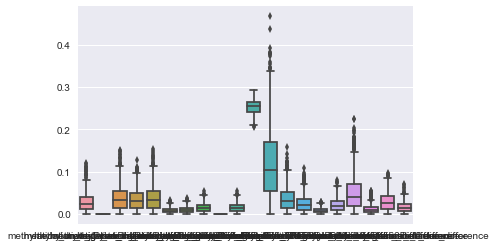

In [94]:
sns.boxplot(meth_mcell)

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


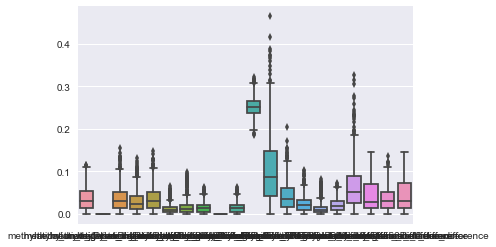

In [95]:
sns.boxplot(meth_pcell)

In [96]:
pdr_mcell = mcell[['PDR_genesDistance_difference', 'PDR_exonsDistance_difference',
       'PDR_intronsDistance_difference', 'PDR_promoterDistance_difference',
       'PDR_cgiDistance_difference', 'PDR_ctcfDistance_difference', 'PDR_ctcfDownDistance_difference',
       'PDR_geneDistalRegulatoryModulesDistance',
       'PDR_vistaEnhancersDistance_difference',
       'PDR_3PrimeUTRDistance_difference', 'PDR_5PrimeUTRDistance_difference',
       'PDR_firstExonDistance_difference',
       'PDR_geneDistalRegulatoryModulesK562Distance_difference',
       'PDR_hypoInHues64Distance_difference', 'PDR_intergenic_difference',
       'PDR_shore_difference', 'PDR_shelf_difference']]

In [97]:
pdr_pcell = pcell[['PDR_genesDistance_difference', 'PDR_exonsDistance_difference',
       'PDR_intronsDistance_difference', 'PDR_promoterDistance_difference',
       'PDR_cgiDistance_difference', 'PDR_ctcfDistance_difference', 'PDR_ctcfDownDistance_difference',
       'PDR_geneDistalRegulatoryModulesDistance',
       'PDR_vistaEnhancersDistance_difference',
       'PDR_3PrimeUTRDistance_difference', 'PDR_5PrimeUTRDistance_difference',
       'PDR_firstExonDistance_difference',
       'PDR_geneDistalRegulatoryModulesK562Distance_difference',
       'PDR_hypoInHues64Distance_difference', 'PDR_intergenic_difference',
       'PDR_shore_difference', 'PDR_shelf_difference']]

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


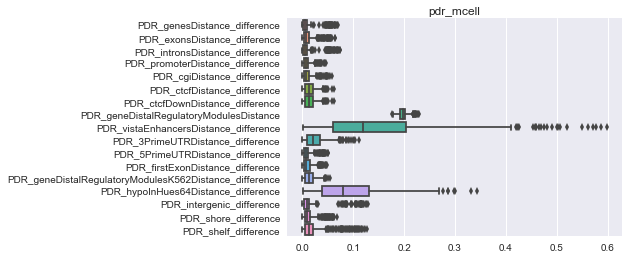

In [98]:
sns.boxplot(pdr_mcell, orient="h")
plt.title("pdr_mcell")

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


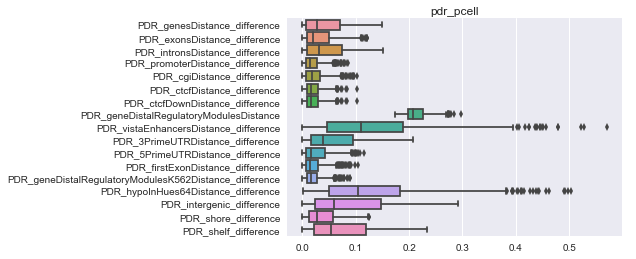

In [99]:
sns.boxplot(pdr_pcell, orient="h")
plt.title("pdr_pcell")

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


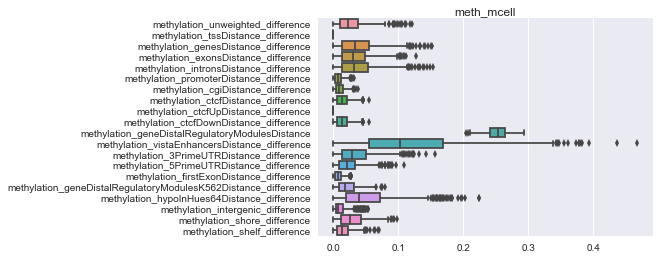

In [100]:
sns.boxplot(meth_mcell, orient="h")
plt.title("meth_mcell")

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


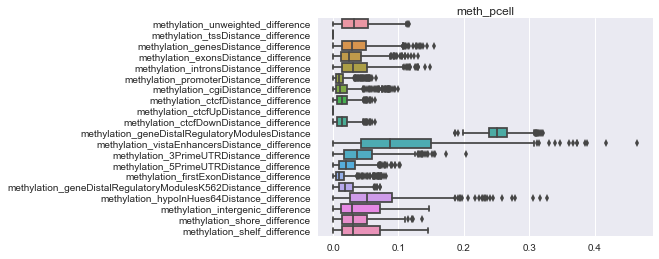

In [101]:
sns.boxplot(meth_pcell, orient="h")
plt.title("meth_pcell")

In [102]:
pdr_mcell_strip = pd.melt(pdr_mcell, var_name='genome_region', value_name='PDR_difference')

In [103]:
pdr_pcell_strip = pd.melt(pdr_pcell, var_name='genome_region', value_name='PDR_difference')

In [104]:
meth_mcell_strip = pd.melt(meth_mcell, var_name='genome_region', value_name='PDR_difference')

In [105]:
meth_pcell_strip = pd.melt(meth_pcell, var_name='genome_region', value_name='PDR_difference')

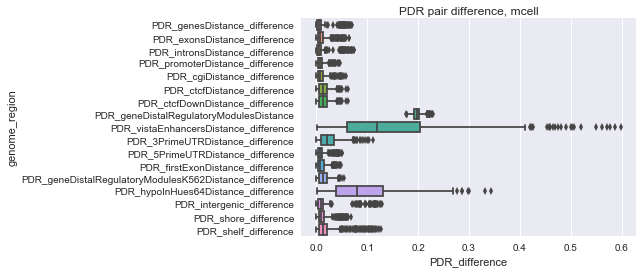

In [106]:
sns.boxplot(y=pdr_mcell_strip.genome_region, x=pdr_mcell_strip.PDR_difference)
plt.title("PDR pair difference, mcell")

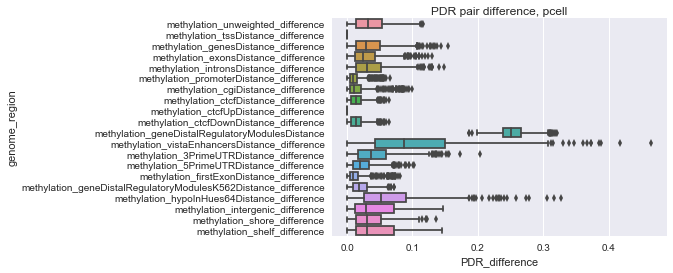

In [108]:
sns.boxplot(y=meth_pcell_strip.genome_region, x=meth_pcell_strip.PDR_difference)
plt.title("PDR pair difference, pcell")

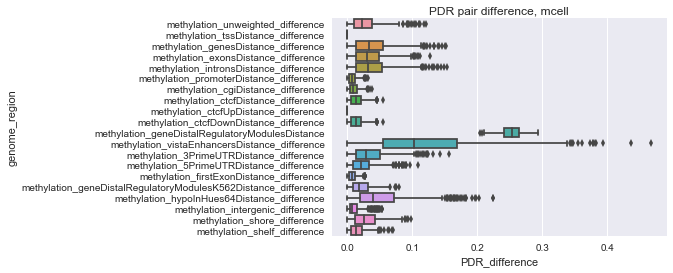

In [109]:
sns.boxplot(y=meth_mcell_strip.genome_region, x=meth_mcell_strip.PDR_difference)
plt.title("PDR pair difference, mcell")

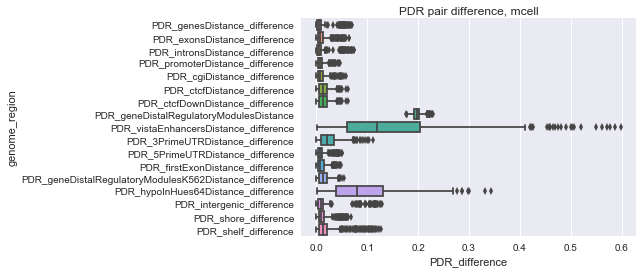

In [110]:
sns.boxplot(y=pdr_mcell_strip.genome_region, x=pdr_mcell_strip.PDR_difference)
plt.title("PDR pair difference, mcell")

In [111]:
pdr_mcell_strip["category"] = str("CD27m")
pdr_pcell_strip["category"] = str("CD27p")

meth_mcell_strip["category"] = str("CD27m")
meth_pcell_strip["category"] = str("CD27p")

In [112]:
total_pdr_pairs = pd.concat([pdr_mcell_strip, pdr_pcell_strip])

In [113]:
total_meth_pairs = pd.concat([meth_mcell_strip, meth_pcell_strip ])

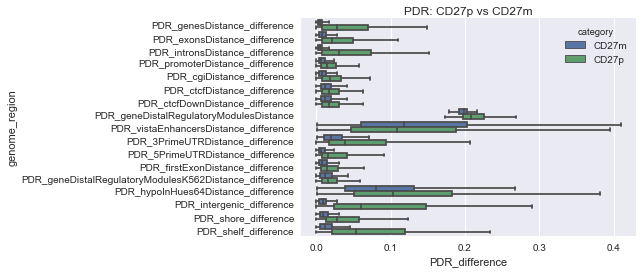

In [115]:
sns.boxplot(y=total_pdr_pairs.genome_region, x=total_pdr_pairs.PDR_difference, hue=total_pdr_pairs.category, showfliers=False)
plt.title("PDR: CD27p vs CD27m")

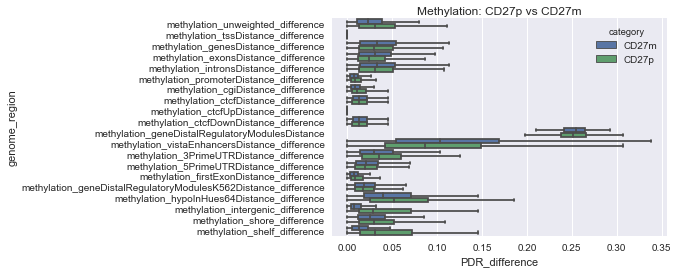

In [117]:
sns.boxplot(y=total_meth_pairs.genome_region, x=total_meth_pairs.PDR_difference, hue=total_meth_pairs.category, showfliers=False)
plt.title("Methylation: CD27p vs CD27m")